# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 設定 data_path
dir_data = 'data/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
#1
app_train['CNT_CHILDREN_GROUP']=[0]*app_train.shape[0]
app_train.loc[app_train['CNT_CHILDREN']==0, ['CNT_CHILDREN_GROUP']]='zero'
app_train.loc[(app_train['CNT_CHILDREN']==1)|(app_train['CNT_CHILDREN']==2), ['CNT_CHILDREN_GROUP']]='one_two'
app_train.loc[app_train['CNT_CHILDREN']>=3&(app_train['CNT_CHILDREN']<=5), ['CNT_CHILDREN_GROUP']]='three_five'
app_train.loc[app_train['CNT_CHILDREN']>5, ['CNT_CHILDREN_GROUP']]='above_five'

app_train['CNT_CHILDREN_GROUP'].value_counts()

zero          215371
three_five     92098
above_five        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [7]:
#2-1
print(app_train.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].mean())
print(app_train.groupby(['TARGET'])['AMT_INCOME_TOTAL'].mean())

CNT_CHILDREN_GROUP
above_five    147910.714286
three_five    174675.217501
zero          166288.713566
Name: AMT_INCOME_TOTAL, dtype: float64
TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64


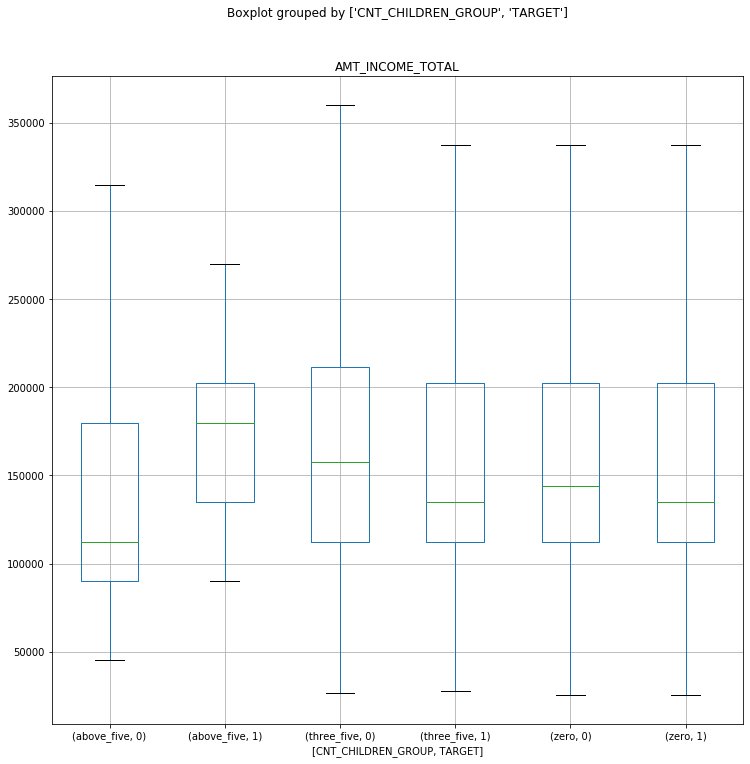

In [8]:
#2-2
app_train.boxplot(column='AMT_INCOME_TOTAL',by=['CNT_CHILDREN_GROUP','TARGET'],showfliers = False, figsize=(12,12))

In [12]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHI_GRP']=app_train.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].apply(lambda x:(x-x.mean())/x.std() )
app_train['AMT_INCOME_TOTAL_Z_BY_TARGET']=app_train.groupby(['TARGET'])['AMT_INCOME_TOTAL'].apply(lambda x:(x-x.mean())/x.std() )

print(app_train['AMT_INCOME_TOTAL_Z_BY_CHI_GRP'].head())
app_train['AMT_INCOME_TOTAL_Z_BY_TARGET'].head()


0    0.345856
1    0.990553
2   -0.943538
3   -0.298841
4   -0.427780
Name: AMT_INCOME_TOTAL_Z_BY_CHI_GRP, dtype: float64


0    0.049403
1    0.913520
2   -0.919453
3   -0.308462
4   -0.430660
Name: AMT_INCOME_TOTAL_Z_BY_TARGET, dtype: float64